<img src="https://user-images.githubusercontent.com/26833433/98702494-b71c4e80-237a-11eb-87ed-17fcd6b3f066.jpg">

This notebook was written by Ultralytics LLC, and is freely available for redistribution under the [GPL-3.0 license](https://choosealicense.com/licenses/gpl-3.0/). 
- [Reference1](https://github.com/ultralytics/yolov5)
- [Reference2](https://www.ultralytics.com)

# Setup

Clone repo, install dependencies and check PyTorch and GPU.

In [1]:
# !git clone https://github.com/ultralytics/yolov5  # clone repo
%cd yolov5
# %pip install -qr requirements.txt  # install dependencies

import torch
from IPython.display import Image, clear_output  # to display images

clear_output()
print('Setup complete. Using torch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))

Setup complete. Using torch 1.8.1+cpu CPU


# 3. Train

- Download and load the Fashion Dataset. A small Dataset containing 180 annotated images for Topwear, Bottomwear and Footwear in the YOLO format (Bounding Boxes)

- We'll use Transfer Learning to retrain the YOLOv5s (Smaller variant of the YOLOv5 models) against this dataset (135 Train 45 Validation) and evaluate its performance aginast a test set containing 45 Images

- All training results are saved to `runs/train/` with incrementing run directories, i.e. `runs/train/exp2`, `runs/train/exp3` etc.


In [ ]:
%cd yolov5
!python train.py -h

/content/yolov5
usage: train.py [-h] [--weights WEIGHTS] [--cfg CFG] [--data DATA] [--hyp HYP]
                [--epochs EPOCHS] [--batch-size BATCH_SIZE]
                [--img-size IMG_SIZE [IMG_SIZE ...]] [--rect]
                [--resume [RESUME]] [--nosave] [--notest] [--noautoanchor]
                [--evolve] [--bucket BUCKET] [--cache-images]
                [--image-weights] [--device DEVICE] [--multi-scale]
                [--single-cls] [--adam] [--sync-bn] [--local_rank LOCAL_RANK]
                [--workers WORKERS] [--project PROJECT] [--entity ENTITY]
                [--name NAME] [--exist-ok] [--quad] [--linear-lr]
                [--label-smoothing LABEL_SMOOTHING] [--upload_dataset]
                [--bbox_interval BBOX_INTERVAL] [--save_period SAVE_PERIOD]
                [--artifact_alias ARTIFACT_ALIAS]

optional arguments:
  -h, --help            show this help message and exit
  --weights WEIGHTS     initial weights path
  --cfg CFG             model.yaml path
 

- The file fashion.yaml contains the Number of Classes, Names of the Classes and the path to the Train and Validation Sets.
- We'll load the Base Weights from YOLOv5s model Trained on the 128 Classes from the COCO Dataset
- We'll Use an image size of 640, with Batch SIze of 2, and we'll train it for 150 Epochs

In [ ]:
# Train YOLOv5s on Fashion Dataset for 150 epochs
!python train.py --img 640 --batch 2 --epochs 150 --data fashion.yaml --weights /content/yolov5/runs/train/exp4/weights/last.pt --nosave --cache

github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v4.0-188-gc8c8da6 torch 1.8.1+cu101 CUDA:0 (Tesla T4, 15109.75MB)

Namespace(adam=False, artifact_alias='latest', batch_size=2, bbox_interval=-1, bucket='', cache_images=True, cfg='', data='./data/fashion.yaml', device='', entity=None, epochs=150, evolve=False, exist_ok=False, global_rank=-1, hyp='data/hyp.scratch.yaml', image_weights=False, img_size=[640, 640], label_smoothing=0.0, linear_lr=False, local_rank=-1, multi_scale=False, name='exp', noautoanchor=False, nosave=True, notest=False, project='runs/train', quad=False, rect=False, resume=False, save_dir='runs/train/exp5', save_period=-1, single_cls=False, sync_bn=False, total_batch_size=2, upload_dataset=False, weights='/content/yolov5/runs/train/exp4/weights/last.pt', workers=8, world_size=1)
tensorboard: Start with 'tensorboard --logdir runs/train', view at http://localhost:6006/
2021-04-07 09:30:32.747796: I tensorflow/stream_executor/platform/default/dso_

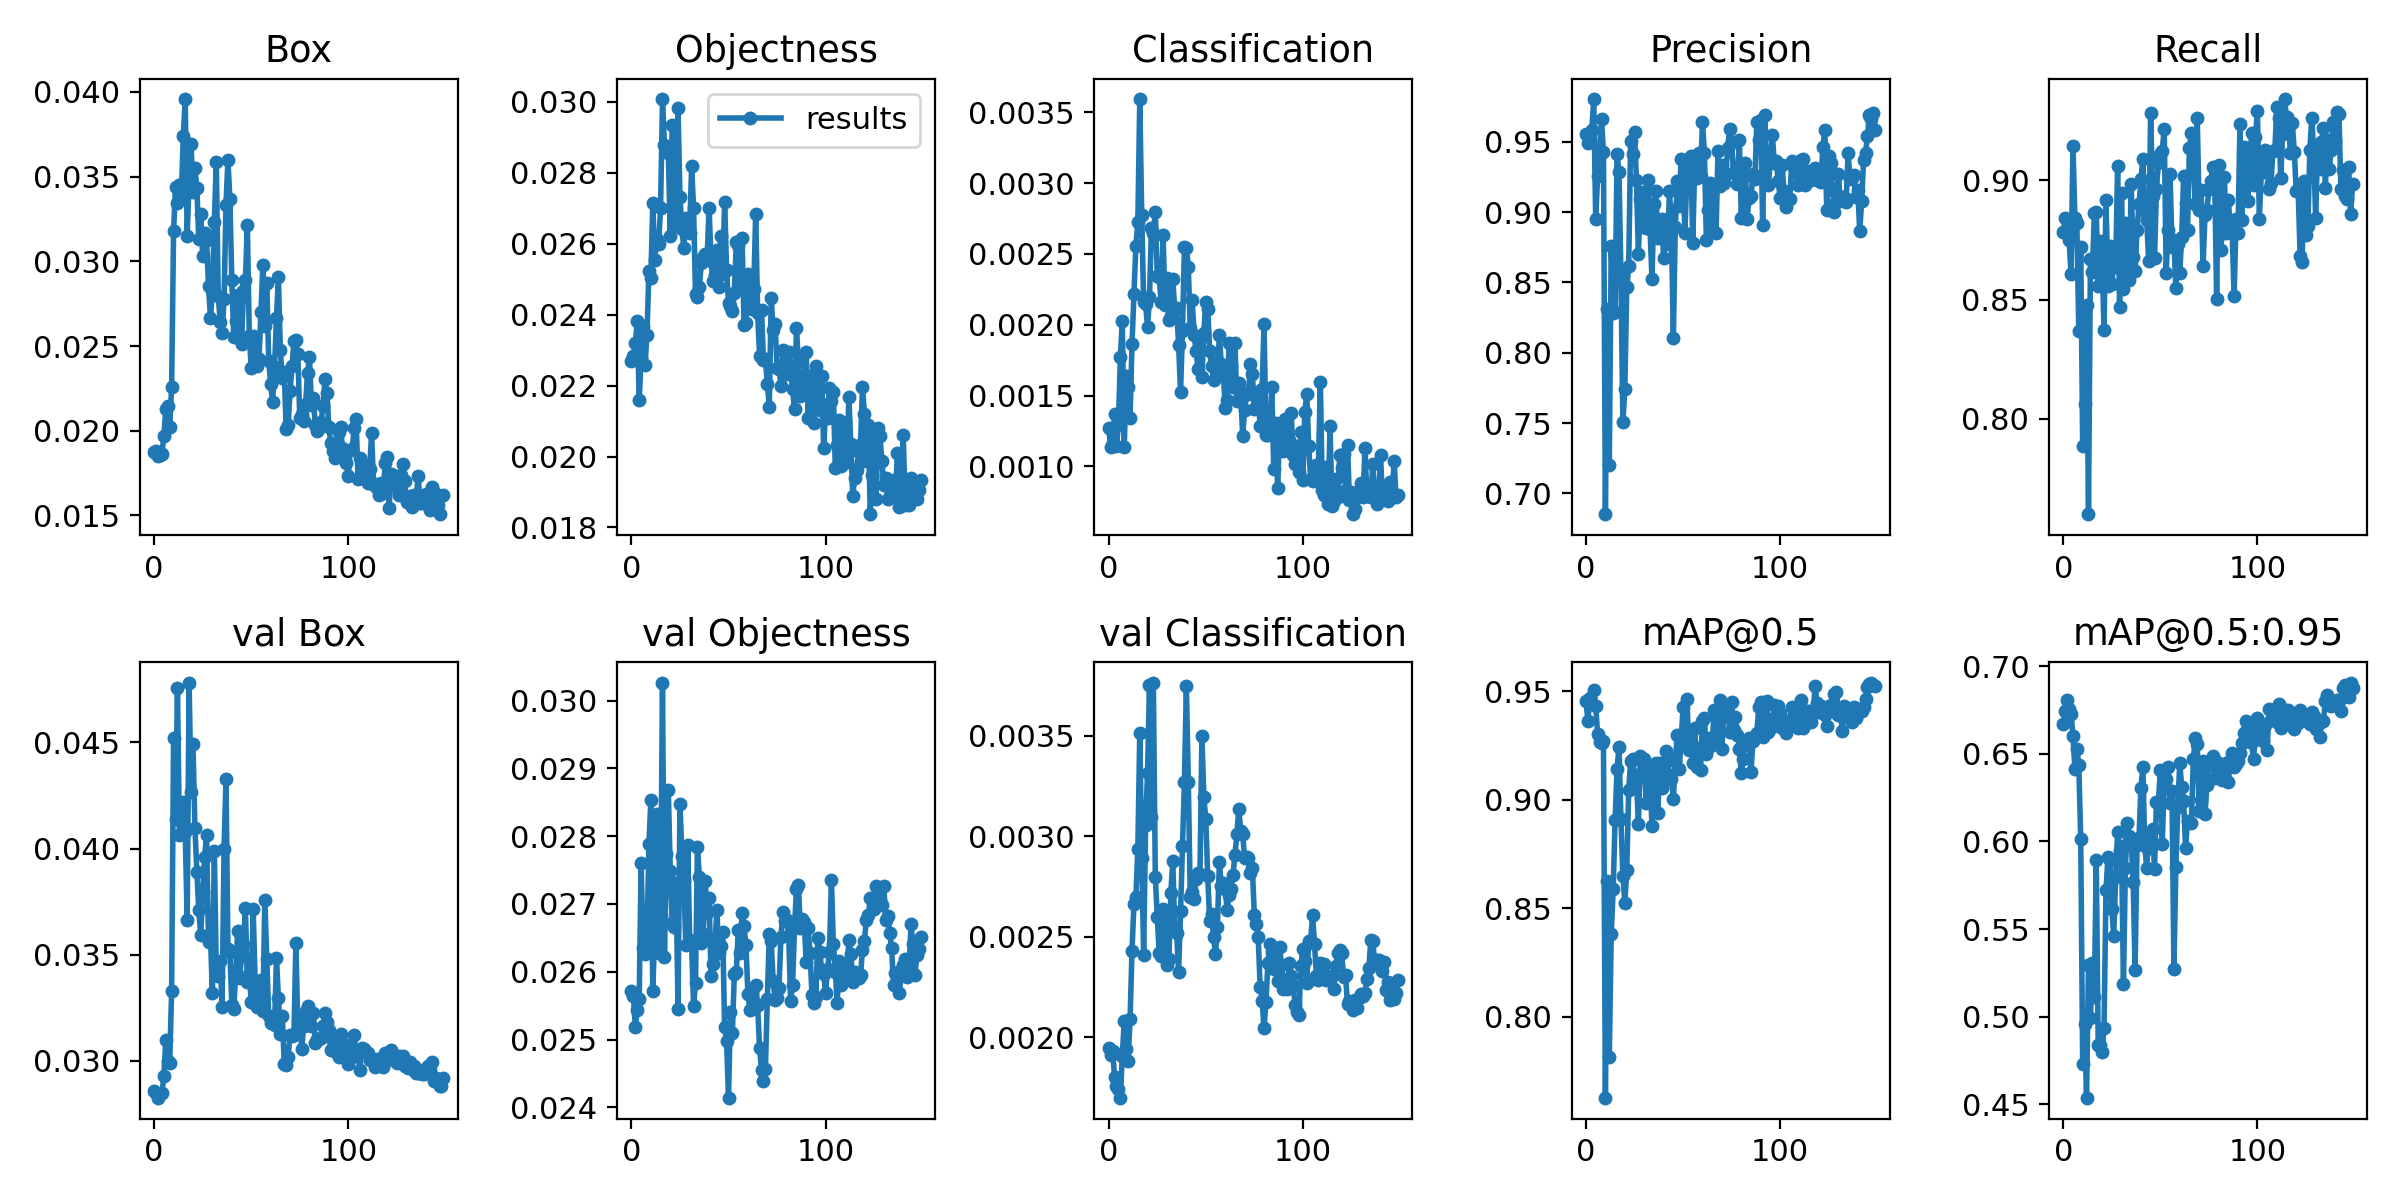

In [ ]:
from utils.plots import plot_results 
plot_results(save_dir='runs/train/exp5')  # plot all results*.txt as results.png
Image(filename='runs/train/exp5/results.png', width=800)

# 1. Inference

`detect.py` runs inference on our Test Set of 45 Images

Results are saved to `runs/detect`. A full list of available inference sources:
<img src="https://user-images.githubusercontent.com/26833433/98274798-2b7a7a80-1f94-11eb-91a4-70c73593e26b.jpg" width="900"> 

In [ ]:
# !unzip ../yolo_test.zip -d ../

In [ ]:
!python detect.py --weights /content/yolov5/runs/train/exp5/weights/last.pt --img 640 --conf 0.5 --source /content/yolo_test

Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.5, device='', exist_ok=False, img_size=640, iou_thres=0.45, name='exp', nosave=False, project='runs/detect', save_conf=False, save_txt=False, source='/content/yolo_test', update=False, view_img=False, weights=['/content/yolov5/runs/train/exp5/weights/last.pt'])
YOLOv5 🚀 v4.0-188-gc8c8da6 torch 1.8.1+cu101 CUDA:0 (Tesla T4, 15109.75MB)

Fusing layers... 
Model Summary: 224 layers, 7059304 parameters, 0 gradients, 16.3 GFLOPS
image 1/45 /content/yolo_test/00258695df.jpg: 640x448 1 topwear, 1 bottomwear, 2 footwears, Done. (0.011s)
image 2/45 /content/yolo_test/004943b75f.jpg: 640x416 1 topwear, 1 bottomwear, Done. (0.010s)
image 3/45 /content/yolo_test/01716bf47a.jpg: 640x480 1 topwear, 1 bottomwear, 2 footwears, Done. (0.010s)
image 4/45 /content/yolo_test/05f58262ca.jpg: 640x512 1 topwear, 1 bottomwear, 2 footwears, Done. (0.012s)
image 5/45 /content/yolo_test/082d845071.jpg: 640x480 2 topwears, 2 bottomwears, 2 fo

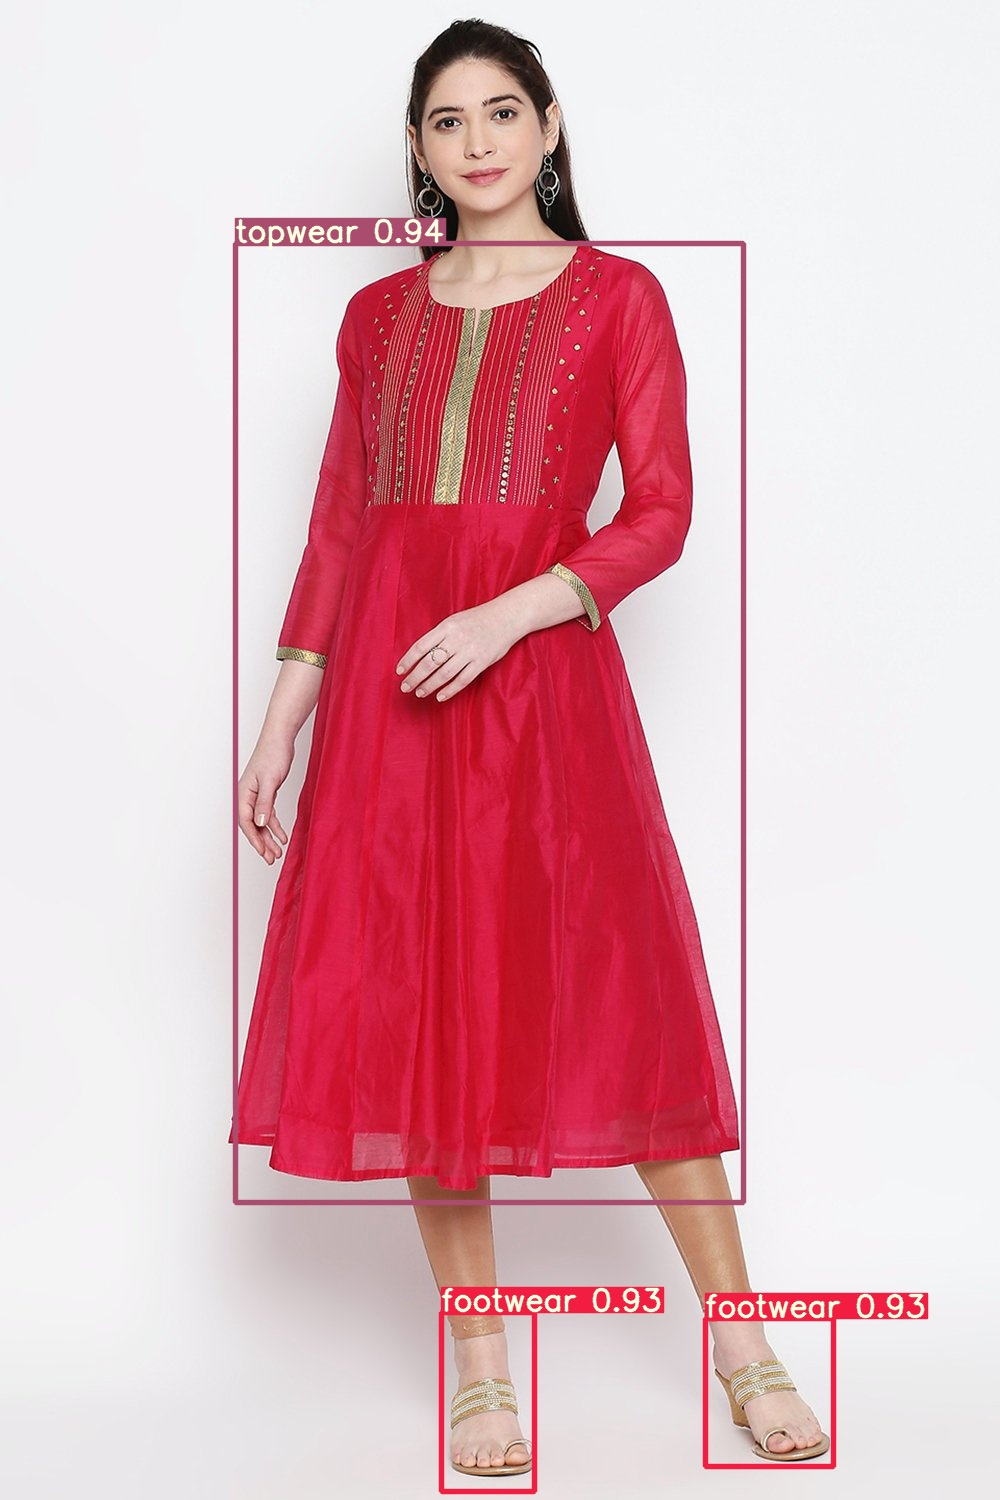

In [ ]:
from IPython.display import Image, clear_output
Image(filename='/content/yolov5/runs/detect/exp3/3cffb00f7d.jpg', width=600)

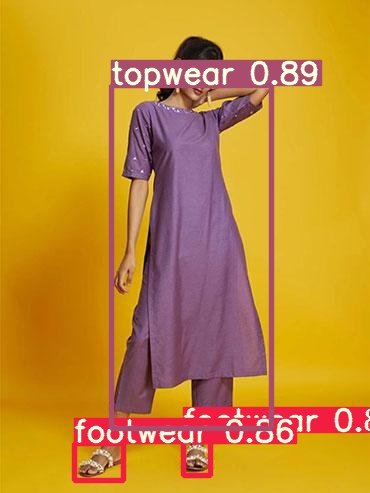

In [ ]:
Image(filename='/content/yolov5/runs/detect/exp3/43f31a14bf.jpg', width=600)

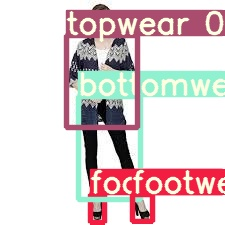

In [ ]:
Image(filename='/content/yolov5/runs/detect/exp3/238e4627c8.jpg', width=600)

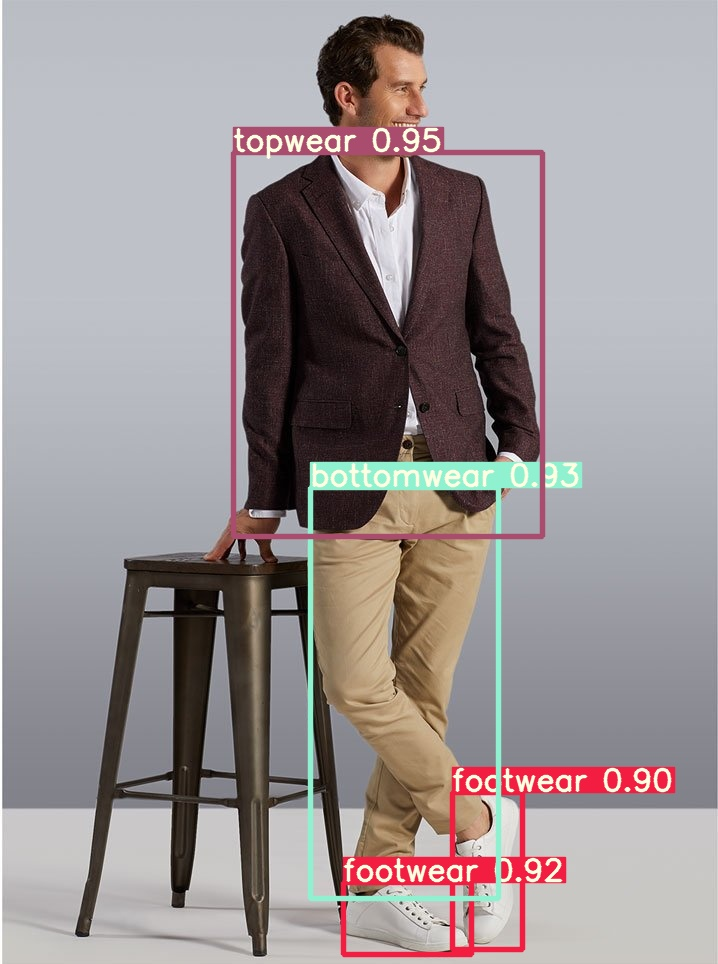

In [ ]:
Image(filename='/content/yolov5/runs/detect/exp3/5e4ef61dad.jpg', width=600)

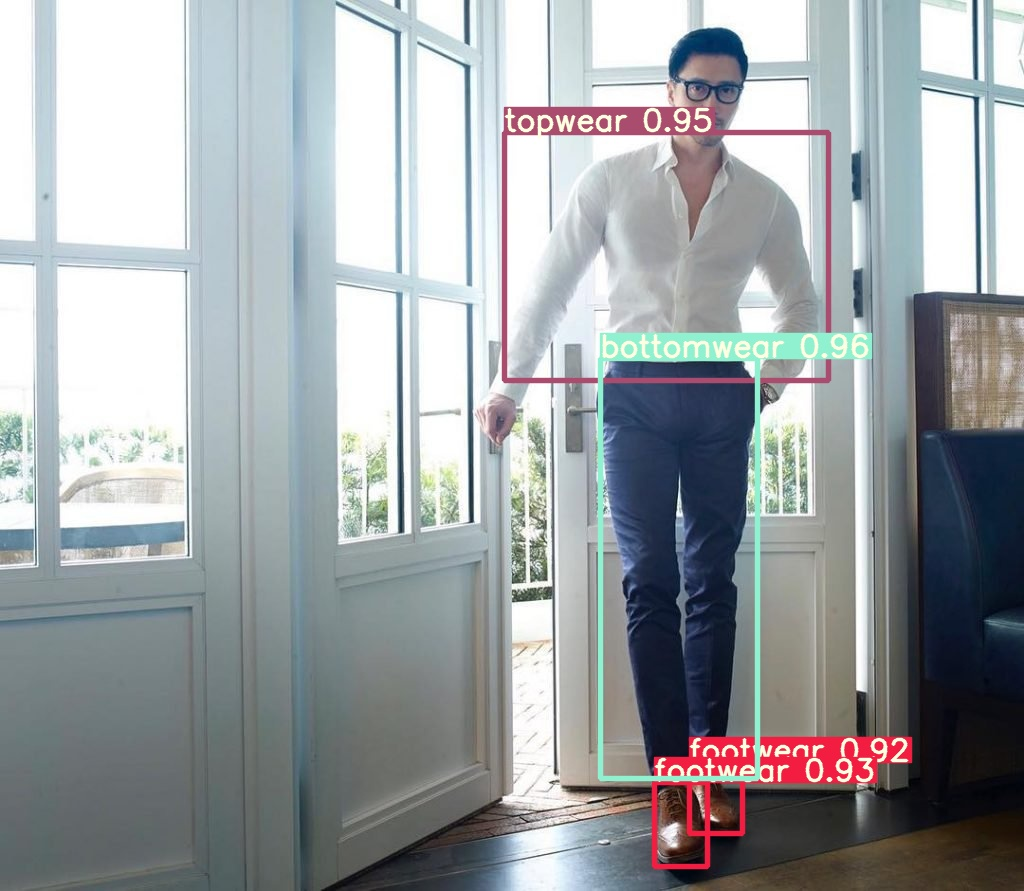

In [ ]:
Image(filename='/content/yolov5/runs/detect/exp3/1cb3849a29.jpg', width=600)

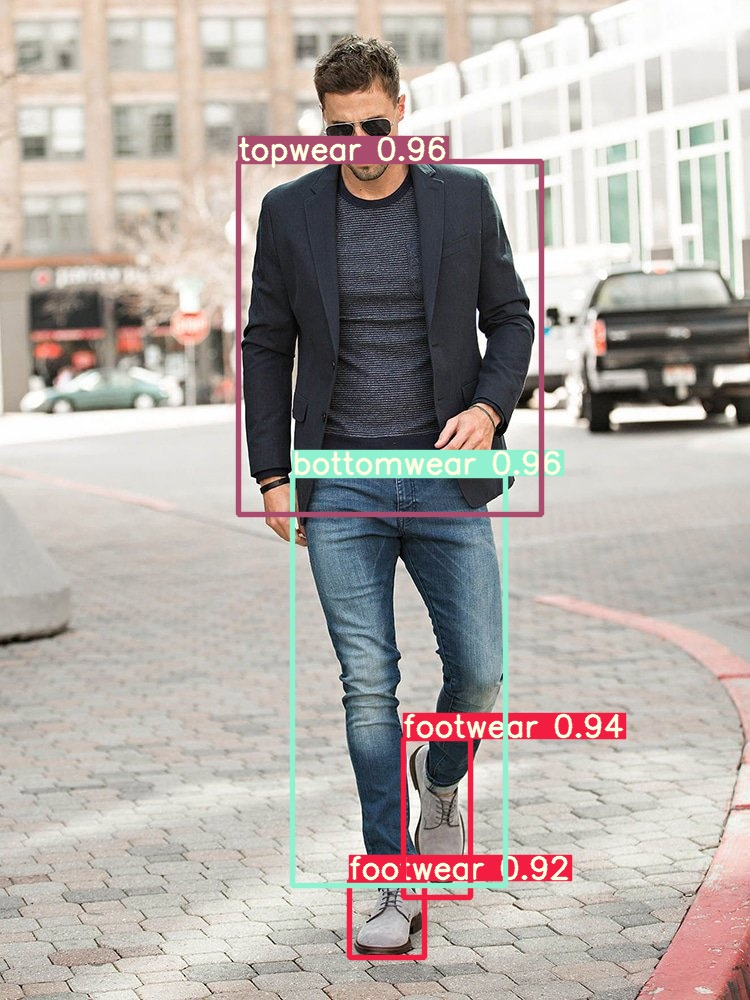

In [ ]:
Image(filename='/content/yolov5/runs/detect/exp3/19c5fb45ca.jpg', width=600)

- The model detections are great and can be used for our purpose
- Next step is to create an inference pipeline for extarcting various parts of the image by using these bounding Boxes.